<a href="https://colab.research.google.com/github/Yufanzh/time_series_analysis/blob/main/sarima_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./RestaurantVisitors.csv')
df.head()

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,1/1/2016,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,1/2/2016,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,1/3/2016,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,1/4/2016,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,1/5/2016,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          517 non-null    object 
 1   weekday       517 non-null    object 
 2   holiday       517 non-null    int64  
 3   holiday_name  517 non-null    object 
 4   rest1         478 non-null    float64
 5   rest2         478 non-null    float64
 6   rest3         478 non-null    float64
 7   rest4         478 non-null    float64
 8   total         478 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 36.5+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [ ]:
df = df.set_index('date')

In [ ]:
df.index.freq = 'D'

In [ ]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [ ]:
# change datatype to integers
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [ ]:
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']

In [ ]:
for col in cols:
  df1[col] = df1[col].astype(int)
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<Axes: xlabel='date'>

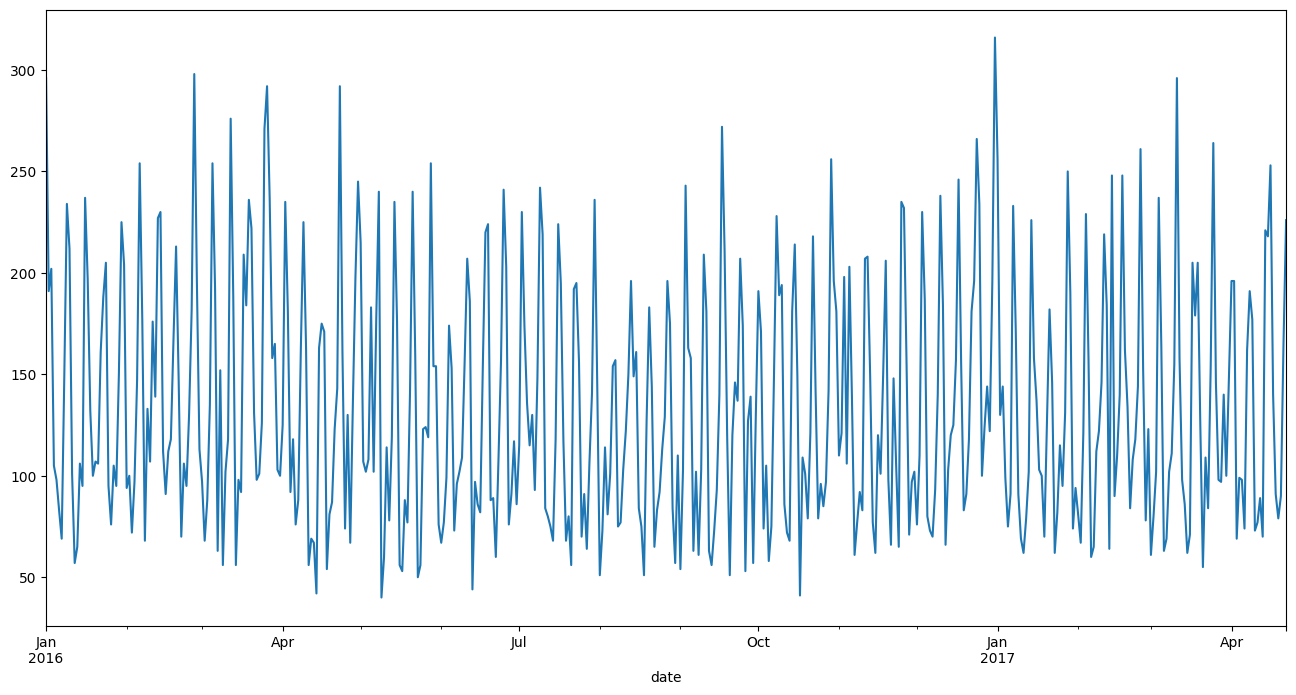

In [ ]:
# prompt: plot 'total' against date

df1['total'].plot(figsize=(16,8))

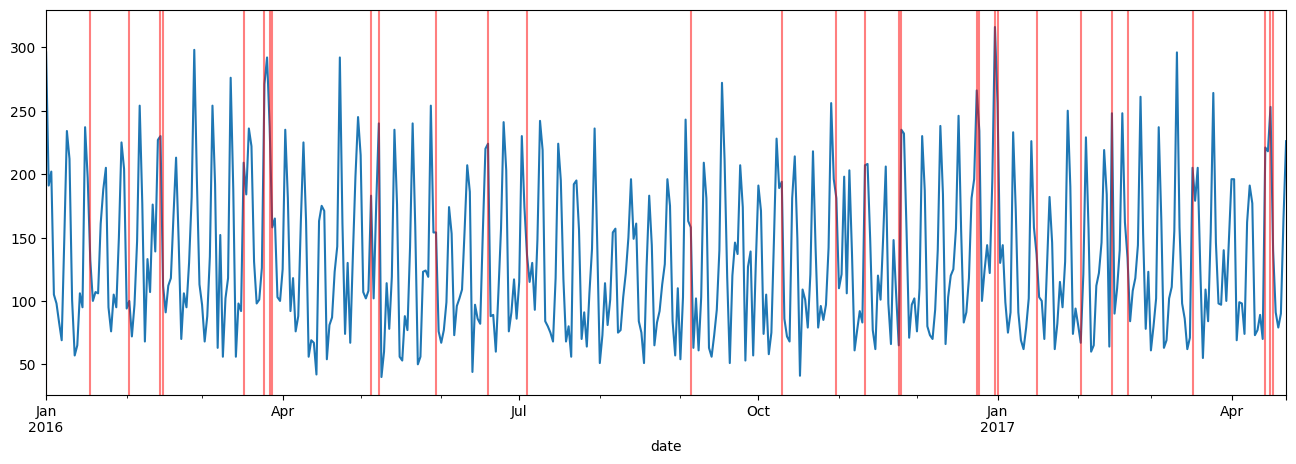

In [ ]:
# doesn't look like a seasonal on month
ax = df1['total'].plot(figsize=(16,5))

#df1[df1['holiday'] == 1].index
for day in df1.query('holiday == 1').index:
  # add a vertical line, mapping the holiday
  ax.axvline(x=day, color='red', alpha=0.5);


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

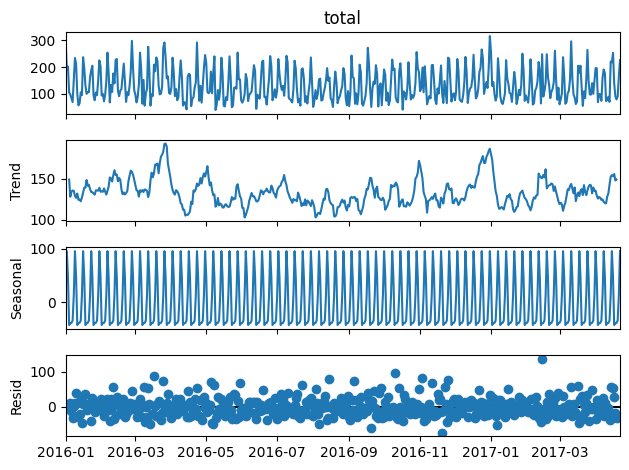

In [ ]:
result = seasonal_decompose(df1['total'])
result.plot();

<Axes: xlabel='date'>

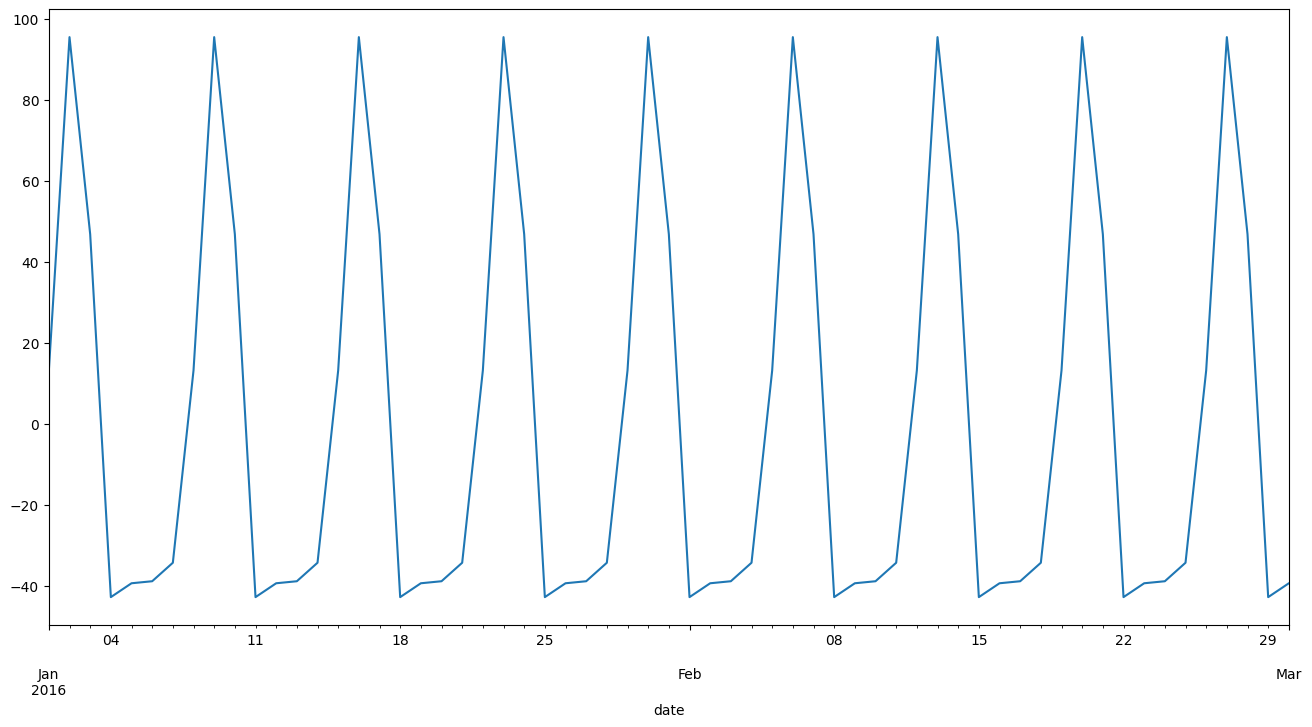

In [ ]:
result.seasonal.plot(figsize=(16,8), xlim=['2016-01-01', '2016-03-01'])

In [ ]:
train = df1.iloc[:len(df1) - 31]
test = df1.iloc[len(df1) - 31:]


In [ ]:
%pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00


In [ ]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.598
Date:                   Wed, 13 Mar 2024   AIC                           4771.197
Time:                           03:10:48   BIC                           4787.875
Sample:                       01-01-2016   HQIC                          4777.754
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3650      1.674      2.607      0.009       1.083       7.647
ar.S.L7        0.9661      0.013     76.835      0.000       0.942       0.991
ma.S.L7       -0.7541      0.051    -14.801      0.000      -0.854      -0.654
sigma2      1269.4981     78.083     16.258      0.000    1116.459    1422.537
===================================================================================
Ljung-Box (L1) (Q):                  15.35   Jarque-Bera (JB):                63.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.74
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# in this version, [1,0,[1], 7] == (0,0,0)x(1,0,1,7)
model = SARIMAX(train['total'], order=(0,0,0), seasonal_order=(1,0,1,7), enforce_invertibility=False)
res = model.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  447
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2220.397
Date:                   Wed, 13 Mar 2024   AIC                           4446.793
Time:                           03:21:25   BIC                           4459.101
Sample:                       01-01-2016   HQIC                          4451.645
                            - 03-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   6.38e-05   1.57e+04      0.000       1.000       1.000
ma.S.L7       -0.9533      0.022    -43.146      0.000      -0.997      -0.910
sigma2      1111.5533     59.729     18.610      0.000     994.486    1228.621
===================================================================================
Ljung-Box (L1) (Q):                  12.45   Jarque-Bera (JB):                80.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.71
Prob(H) (two-sided):                  0.98   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(test) + len(train) - 1
predict = res.predict(start, end).rename('SARIMA prediction')

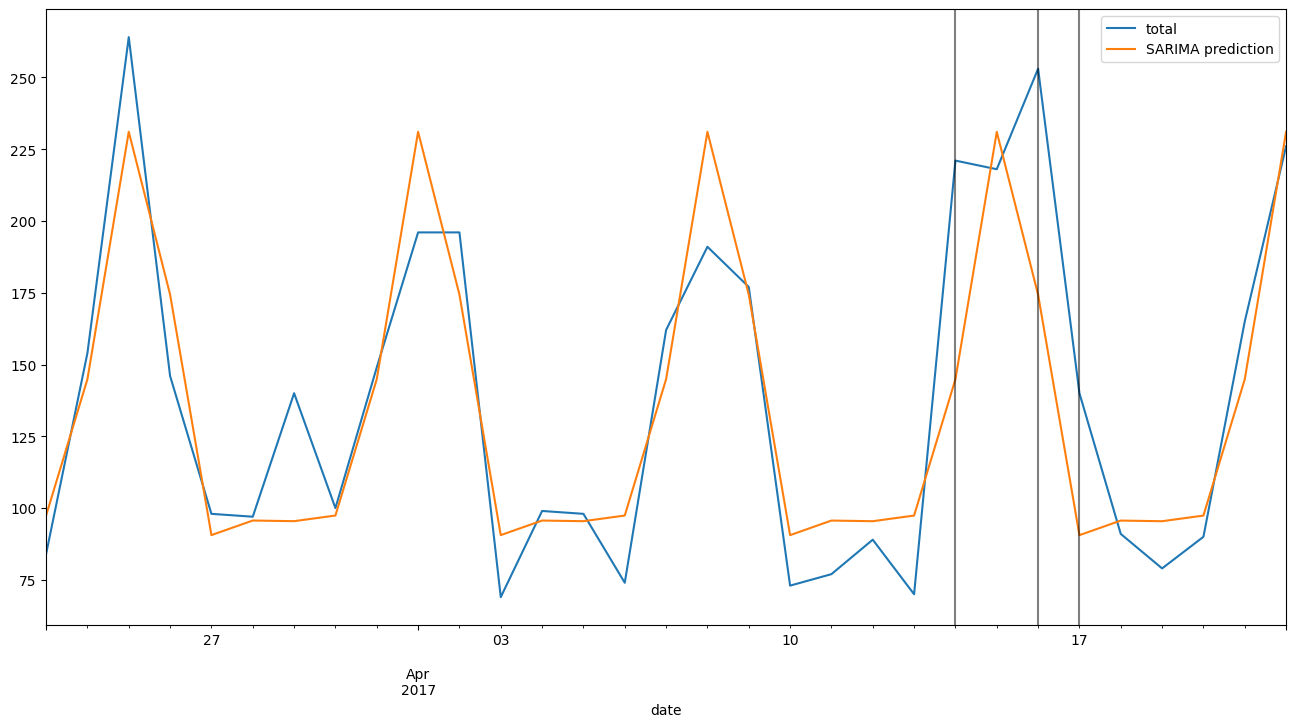

In [ ]:
ax = test['total'].plot(figsize=(16,8), legend=True)

predict.plot(legend=True)
#df1[df1['holiday'] == 1].index
for day in df1.query('holiday == 1').index:
  # add a vertical line, mapping the holiday
  ax.axvline(x=day, color='black', alpha=0.5);

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse

In [ ]:
error = rmse(test['total'], predict)

In [ ]:
error

28.776797540482445

In [ ]:
test['total'].mean()

138.25806451612902

In [ ]:
# including exou
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.598
Date:                   Wed, 13 Mar 2024   AIC                           4771.197
Time:                           03:39:55   BIC                           4787.875
Sample:                       01-01-2016   HQIC                          4777.754
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3650      1.674      2.607      0.009       1.083       7.647
ar.S.L7        0.9661      0.013     76.835      0.000       0.942       0.991
ma.S.L7       -0.7541      0.051    -14.801      0.000      -0.854      -0.654
sigma2      1269.4981     78.083     16.258      0.000    1116.459    1422.537
===================================================================================
Ljung-Box (L1) (Q):                  15.35   Jarque-Bera (JB):                63.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.74
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train our SARIMA

In [ ]:
model = SARIMAX(train['total'], exog = train[['holiday']], order=(1,0,1), seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [ ]:
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  447
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2147.287
Date:                           Wed, 13 Mar 2024   AIC                           4306.575
Time:                                   03:50:25   BIC                           4331.190
Sample:                               01-01-2016   HQIC                          4316.279
                                    - 03-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.8178      4.221     16.305      0.000      60.545      77.090
ar.L1          0.9999      0.000   2748.732      0.000       0.999       1.001
ma.L1         -1.0005      0.002   -483.706      0.000      -1.005      -0.996
ar.S.L7        0.9999      0.000   3994.385      0.000       0.999       1.000
ma.S.L7       -0.9669      0.028    -35.129      0.000      -1.021      -0.913
sigma2       802.1602     47.142     17.016      0.000     709.764     894.557
===================================================================================
Ljung-Box (L1) (Q):                  13.89   Jarque-Bera (JB):                21.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.29
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = res.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')

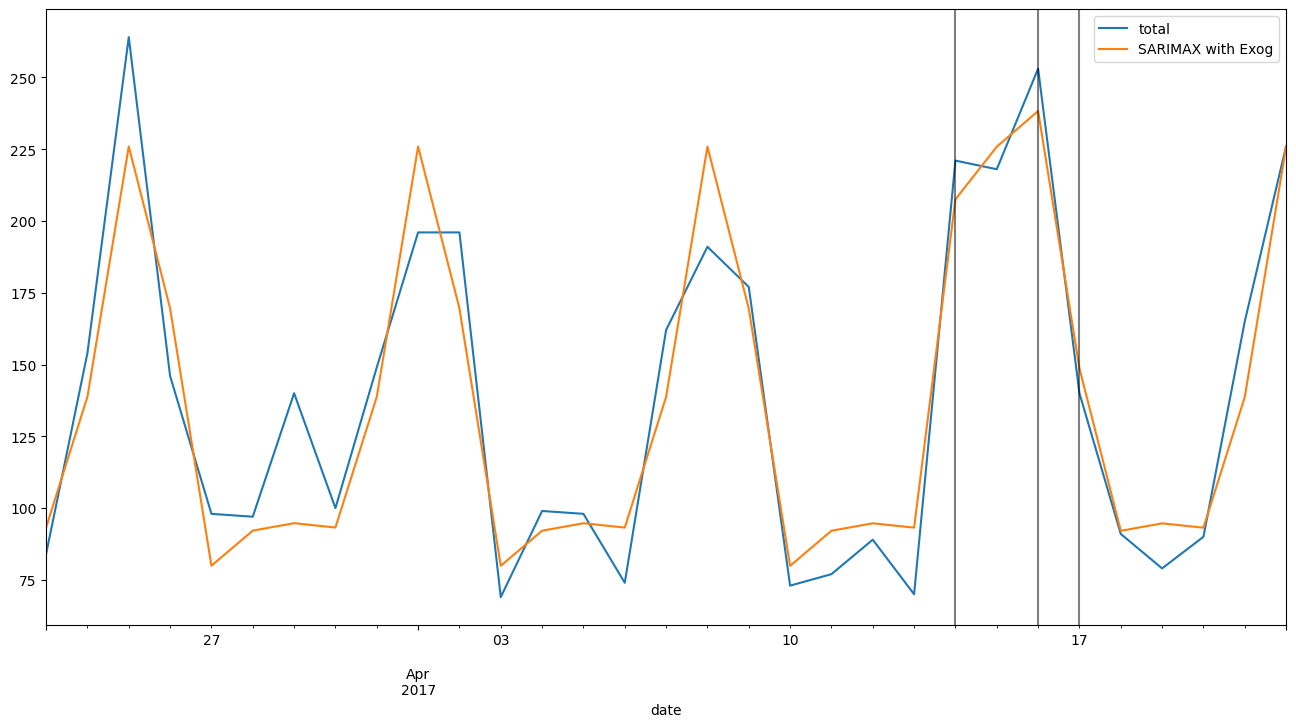

In [ ]:
ax=test['total'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True)
for day in df1.query('holiday == 1').index:
  # add a vertical line, mapping the holiday
  ax.axvline(x=day, color='black', alpha=0.5);

In [ ]:
error = rmse(test['total'], predictions)

In [ ]:
error

18.970271218860773

## FORECAST INTO THE FUTURE

In [ ]:
# prompt: use the model I created above with exogenous and create model on the whole dataset

model = SARIMAX(df1['total'], exog = df1[['holiday']], order=(1,0,1), seasonal_order=(1,0,1,7), enforce_invertibility=False)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2286.124
Date:                           Wed, 13 Mar 2024   AIC                           4584.248
Time:                                   03:55:56   BIC                           4609.265
Sample:                               01-01-2016   HQIC                          4594.083
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.0691      4.049     17.305      0.000      62.133      78.005
ar.L1          0.9998      0.001   1511.934      0.000       0.999       1.001
ma.L1         -0.9989      0.004   -282.983      0.000      -1.006      -0.992
ar.S.L7        0.9999      0.000   4106.073      0.000       0.999       1.000
ma.S.L7       -1.0338      0.028    -36.421      0.000      -1.089      -0.978
sigma2       729.8803     52.801     13.823      0.000     626.393     833.368
===================================================================================
Ljung-Box (L1) (Q):                  12.54   Jarque-Bera (JB):                24.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.27
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

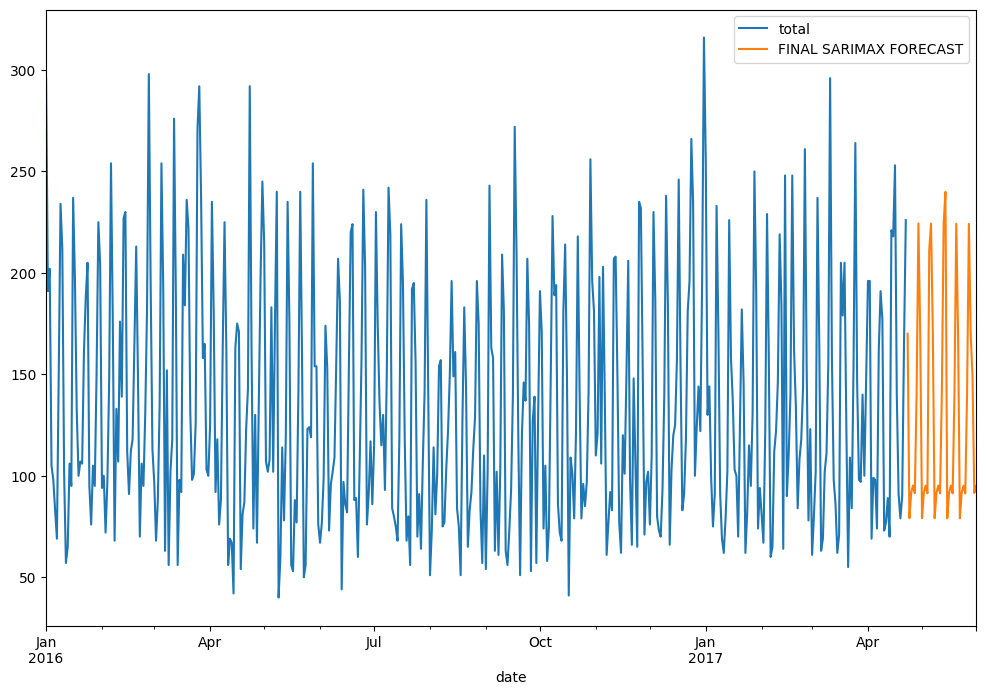

In [ ]:
exog_forecast = df[478:][['holiday']]
start1 = len(df1)
end1 = len(df1) + 38
forecast = res.predict(start1, end1, exog=exog_forecast).rename('FINAL SARIMAX FORECAST')
df1['total'].plot(figsize=(12,8), legend=True)
forecast.plot(legend=True)